In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('./age_salary.csv')

In [4]:
scaler = StandardScaler()
df[['age', 'EstimatedSalary']] = scaler.fit_transform(df[['Age', 'EstimatedSalary']])

In [5]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [7]:
male_purchased = df[df['Gender'] == 0]['Purchased']
female_purchased = df[df['Gender'] == 1]['Purchased']

In [8]:
print("Male Purchased Mean: ", male_purchased.mean())
print("Female Purchased Mean: ", female_purchased.mean())
print("Male Purchased Std: ", male_purchased.std())
print("Female Purchased Std: ", female_purchased.std())

Male Purchased Mean:  0.37745098039215685
Female Purchased Mean:  0.336734693877551
Male Purchased Std:  0.48594164598182643
Female Purchased Std:  0.47380354147934284


In [9]:
print("Description of 'age' and 'EstimatedSalary':")
print(df[['age', 'EstimatedSalary']].describe())

Description of 'age' and 'EstimatedSalary':
                age  EstimatedSalary
count  4.000000e+02     4.000000e+02
mean  -7.105427e-17    -1.776357e-17
std    1.001252e+00     1.001252e+00
min   -1.877311e+00    -1.607506e+00
25%   -7.550313e-01    -7.852897e-01
50%   -6.256110e-02     7.561451e-03
75%    7.970571e-01     5.361289e-01
max    2.134241e+00     2.356750e+00


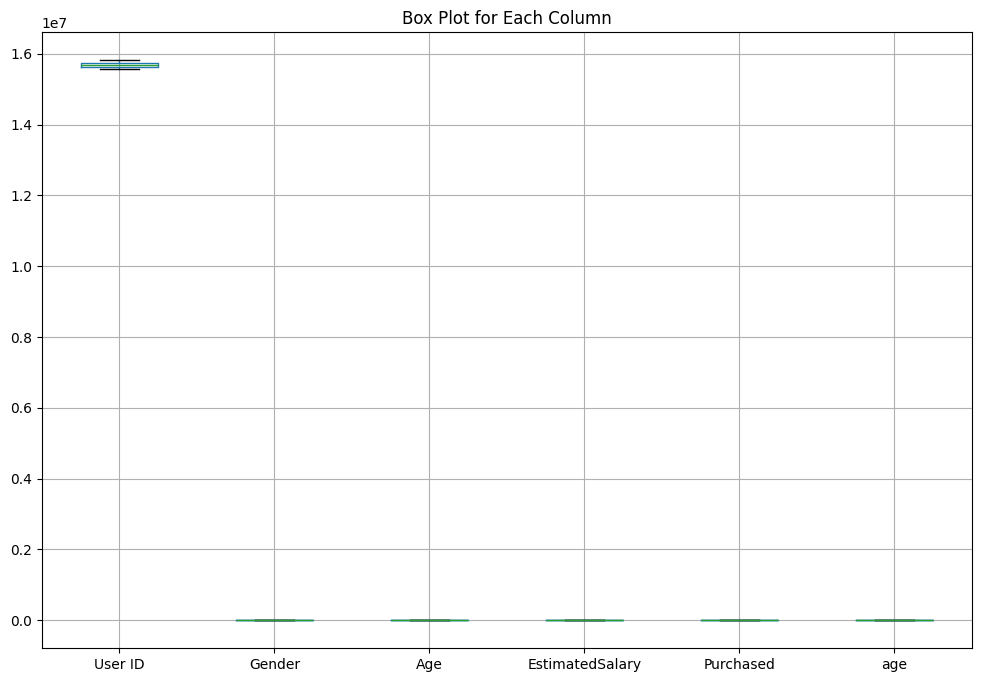

In [10]:
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Box Plot for Each Column')
plt.show()

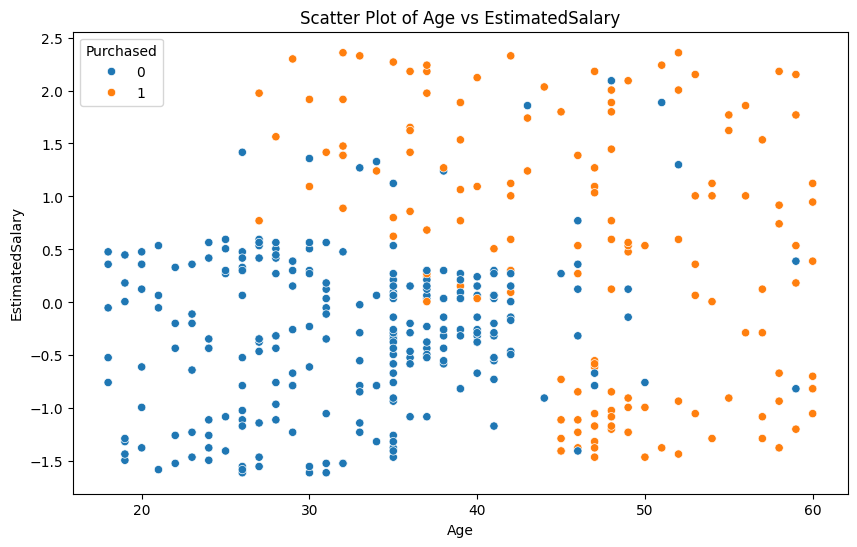

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased')
plt.title('Scatter Plot of Age vs EstimatedSalary')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df[['age', 'EstimatedSalary']])

KMeans(n_clusters=3, random_state=42)

In [15]:
new_data = np.array([
    [0.1, 0.2], [0.3, 0.6], [0.5, 0.8], [0.7, 0.2], [0.9, 0.4],
    [0.2, 0.5], [0.4, 0.9], [0.6, 0.1], [0.8, 0.3], [1.0, 0.7]
])

In [16]:
new_data_scaled = scaler.transform(new_data)
predicted_clusters = kmeans.predict(new_data_scaled)

/Users/amirali/Desktop/p/moj-last-proj/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/amirali/Desktop/p/moj-last-proj/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [17]:
print("Predicted Clusters for New Points: ", predicted_clusters)

Predicted Clusters for New Points:  [0 0 0 0 0 0 0 0 0 0]


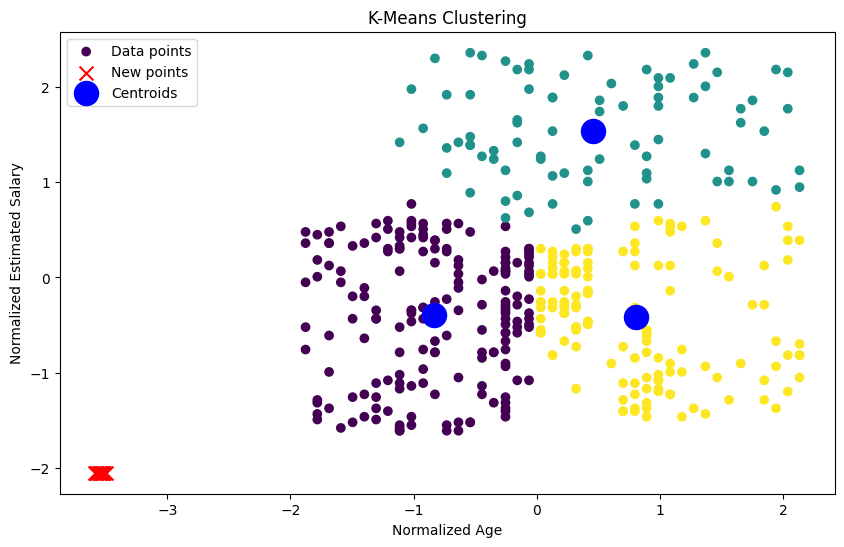

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['EstimatedSalary'], c=kmeans.labels_, cmap='viridis', marker='o', label='Data points')
plt.scatter(new_data_scaled[:, 0], new_data_scaled[:, 1], c='red', marker='x', s=100, label='New points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='blue', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Normalized Age')
plt.ylabel('Normalized Estimated Salary')
plt.legend()
plt.show()